In [1]:
# Machine Learning HW1

import matplotlib.pyplot as plt
import numpy as np
# more imports
import random

In [32]:
# Parse the file and return 2 numpy arrays
def load_data_set(filename):
    # your code
    x = []
    y = []
    f = open(filename, 'r')
    for line in f:
        data = line.split()
        x.append(data[:-1]) #elements before the last column
        y.append(data[-1]) #the last element
    return np.array(x,dtype=float), np.array(y,dtype=float).reshape(-1,1)

# Find theta using the normal equation
def normal_equation(x, y):
    # your code
    inv_xTx = np.linalg.inv(np.dot(x.T,x))
    theta = inv_xTx.dot(x.T).dot(y).reshape(-1,1)
    return theta.reshape(-1,1)

# Find thetas using stochiastic gradient descent
# Don't forget to shuffle
def stochiastic_gradient_descent(x, y, learning_rate, num_iterations):
    # your code
    # Initialize thetas with zeros
    theta = np.zeros((x[1].shape),dtype=float)
    thetas = []
    for j in range(num_iterations):
        # shuffle the training set
        total = np.concatenate((x,y), axis = 1) # conbine x and y in the colums
        np.random.shuffle(total)
        x = total.T[:2].T
        y = total.T[-1].T.reshape(-1,1)
        # random smaple
        i = random.randrange(0,x.shape[0],1)
        theta = theta + learning_rate * (y[i] - x[i].T.dot(theta))* x[i]
        thetas.append(theta)
    return thetas

# Find thetas using gradient descent
def gradient_descent(x, y, learning_rate, num_iterations):
    # your code
    # Initialize thetas with zeros
    theta = np.zeros((x[1].shape[0],1),dtype=float)
    thetas = []
    for j in range(num_iterations):
        theta = theta + learning_rate * x.T.dot(y - x.dot(theta))
        thetas.append(theta)
    return thetas

# Find thetas using minibatch gradient descent
# Don't forget to shuffle
def minibatch_gradient_descent(x, y, learning_rate, num_iterations, batch_size):
    # your code
    thetas = []
    theta = np.zeros((x[1].shape[0],1),dtype=float)
    for j in range(num_iterations):
        # shuffle the training set
        total = np.concatenate((x,y), axis = 1) # conbine x and y in the colums
        np.random.shuffle(total)
        x = total.T[:2].T
        y = total.T[-1].T.reshape(-1,1)
        # random smaple
        i = random.randrange(0,x.shape[0],batch_size)
        x_sam = x[i:i+batch_size]
        y_sam = y[i:i+batch_size]
        theta = theta + learning_rate * x_sam.T.dot(y_sam - x_sam.dot(theta))
        thetas.append(theta)
    return thetas



In [4]:
# Given an array of x and theta predict y
def predict(x, theta):
    # your code
    y_predict = x.dot(theta)
    return y_predict

# Given an array of y and y_predict return loss
def get_loss(y, y_predict):
    # your code
    loss = np.sum(np.square(y - y_predict)) / 2
    return loss

In [5]:
# Given a list of thetas one per epoch
# this creates a plot of epoch vs training error
def plot_training_errors(x, y, thetas, title):
    losses = []
    epochs = []
    losses = []
    epoch_num = 1
    for theta in thetas:
        losses.append(get_loss(y, predict(x, theta)))
        epochs.append(epoch_num)
        epoch_num += 1
    plt.plot(epochs, losses)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title(title)
    plt.show()

# Given x, y, y_predict and title,
# this creates a plot
def plot(x, y, theta, title):
    # plot
    y_predict = predict(x, theta)
    plt.scatter(x[:, 1], y)
    plt.plot(x[:, 1], y_predict)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.show()

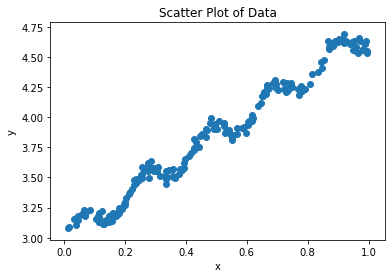

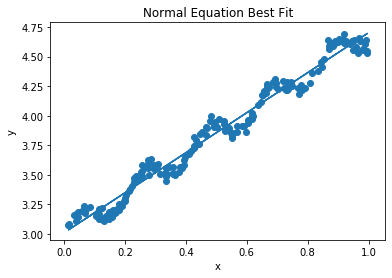

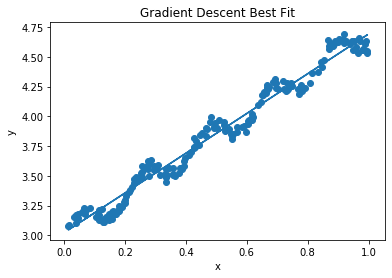

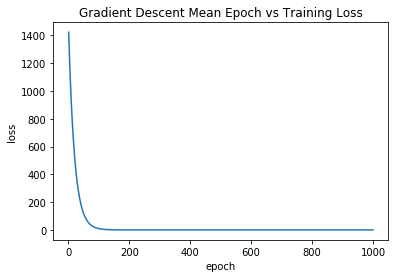

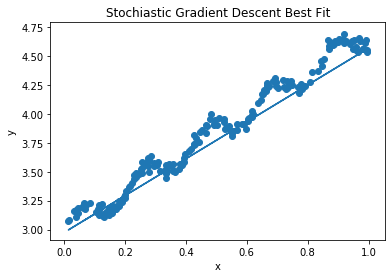

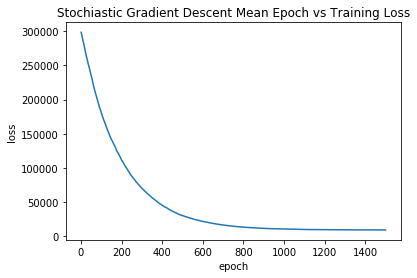

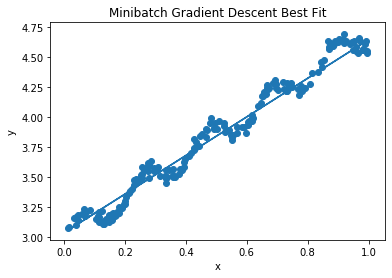

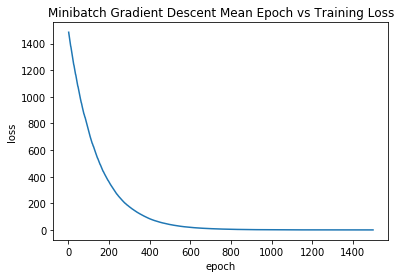

In [33]:
if __name__ == "__main__":
    x, y = load_data_set('regression-data.txt')
    # plot
    plt.scatter(x[:, 1], y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Scatter Plot of Data")
    plt.show()

    theta = normal_equation(x, y)
    plot(x, y, theta, "Normal Equation Best Fit")

    # You should try multiple non-zero learning rates and  multiple different (non-zero) number of iterations
    thetas = gradient_descent(x, y, learning_rate = 0.0001, num_iterations = 1000) 
    plot(x, y, thetas[-1], "Gradient Descent Best Fit")
    plot_training_errors(x, y, thetas, "Gradient Descent Mean Epoch vs Training Loss")

    # You should try multiple non-zero learning rates and  multiple different (non-zero) number of iterations
    thetas = stochiastic_gradient_descent(x, y, learning_rate = 0.002, num_iterations = 1500) # Try different learning rates and number of iterations
    plot(x, y, thetas[-1], "Stochiastic Gradient Descent Best Fit")
    plot_training_errors(x, y, thetas, "Stochiastic Gradient Descent Mean Epoch vs Training Loss")

    # You should try multiple non-zero learning rates and  multiple different (non-zero) number of iterations
    thetas = minibatch_gradient_descent(x, y, learning_rate = 0.0002, num_iterations = 1500, batch_size = 15)
    plot(x, y, thetas[-1], "Minibatch Gradient Descent Best Fit")
    plot_training_errors(x, y, thetas, "Minibatch Gradient Descent Mean Epoch vs Training Loss")